<a href="https://colab.research.google.com/github/claudiaesnarrizaga/SISTEMAS-DE-CONTROL/blob/main/PROYECTO_FINAL_SISTEMAS_DE_CONTROL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO FINAL SISTEMAS DE CONTROL**
##**Inverted Pendulum Stabilization using PID Control**

**Nombre: Claudia Esnarrizaga Rodríguez**

**Fecha: 08/04/2024**

**Curso: 3ºB Ingeniería Matemática**

## **1. OBJETIVO**

El objetivo del proyecto final es diseñar y simular un sistema de control para estabilizar un péndulo invertido utilizando un controlador PID (Proporcional-Integral-Derivativo) en Python, mientras se exploran temas adicionales relacionados con el tema.

## **2. DESCRIPCIÓN DEL PROYECTO**

###**2.1 Modelado**

El sistema del péndulo invertido puede ser modelado utilizando las siguientes ecuaciones de movimiento:

\begin{equation}
\ddot{\theta} = \frac{g}{l} \sin \theta + \frac{u}{ml^2} \quad (1)
\end{equation}

\begin{equation}
\dot{\omega} = \ddot{\theta} \quad (2)
\end{equation}

donde $\theta$ es el ángulo del péndulo, $\omega$ es la velocidad angular, $g$ es la aceleración debido a la gravedad, $l$ es la longitud del péndulo, $m$ es la masa del péndulo y $u$ es la entrada de control.

Al linealizar el modelo alrededor del punto de equilibrio ($\theta = 0$, $\omega = 0$) y aplicar Laplace, obtenemos la función de transferencia:

\begin{equation}
G(s) = \frac{\Theta(s)}{U(s)} = \frac{1}{s^2 - \frac{g}{l}}
\end{equation}


Instalemos e importemos todas las librerías necesarias:

In [ ]:
#!pip install control

In [ ]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

Definamos los parámetros de nuestro sistema.

In [ ]:
g = 9.81  # Aceleración debido a la gravedad (m/s^2)
l = 1.0   # Longitud del péndulo (m)
m = 1.0   # Masa del péndulo (kg)

Definamos la función de transferencias del sistema.

In [ ]:
num = [1]
den = [1, 0, -g/l]
G = ctrl.TransferFunction(num, den)

Diseñemos nuestro controlador PID

In [ ]:
Kp = 100  # Ganancia proporcional
Ki = 10   # Ganancia integral
Kd = 20   # Ganancia derivativa
controlador = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])

A continuación vamos a crear nuestro sistema de lazo cerrado

In [ ]:
sistema = ctrl.feedback(controlador*G, sign=-1)

#### **Simulación de la respuesta del sistema**

In [ ]:
t = np.linspace(0, 10, 1000)
t, y = ctrl.step_response(sistema, T=t)

Grafiquemos la respuesta de la simulación:

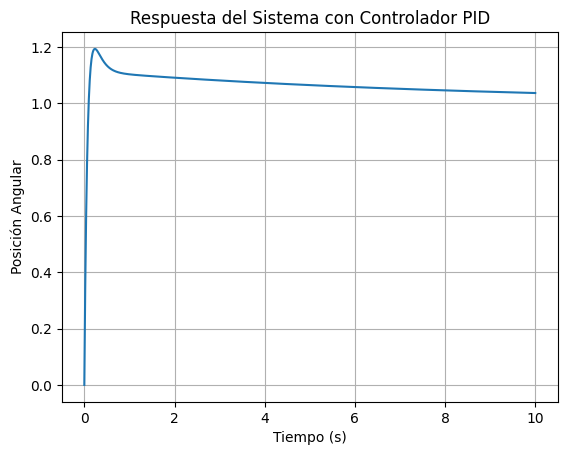

In [ ]:
plt.plot(t, y)
plt.title('Respuesta del Sistema con Controlador PID')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición Angular')
plt.grid(True)
plt.show()

### **2.2 Análisis de estabilidad**

El análisis de estabilidad del sistema del péndulo invertido se puede llevar a cabo utilizando el método de Routh-Hurwitz. La ecuación característica del sistema es:

\begin{equation}
s^2 - \frac{g}{l} = 0 \quad (4)
\end{equation}

Para que el sistema sea estable, todas las raíces de la ecuación característica deben tener partes reales negativas. Se puede determinar el rango de parámetros del sistema para garantizar la estabilidad.

Calculemos los polos del sistema.

In [ ]:
poles = ctrl.poles(G)

print("Polos del sistema:", poles)

Polos del sistema: [-3.13209195+0.j  3.13209195+0.j]


Verifiquemos la estabilidad utilizando el criterio de Routh-Hurwitz.

In [ ]:
if all(p.real < 0 for p in poles):
    print("El sistema es estable según el criterio de Routh-Hurwitz.")
else:
    print("El sistema puede no ser estable según el criterio de Routh-Hurwitz.")

El sistema puede no ser estable según el criterio de Routh-Hurwitz.


Grafiquemos los puntos para ver dónde están situados.

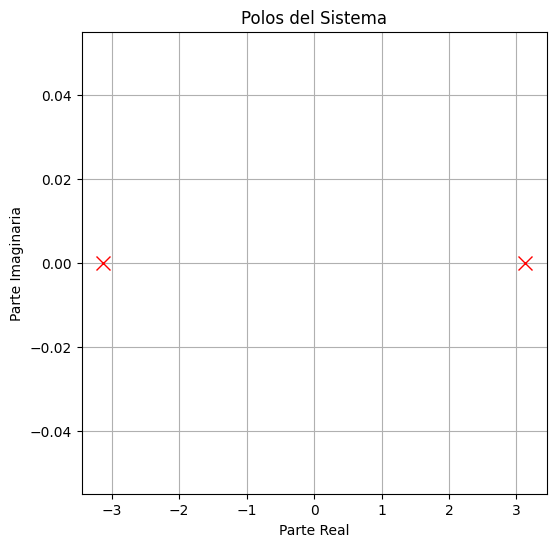

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(np.real(poles), np.imag(poles), 'rx', markersize=10)
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.title('Polos del Sistema')
plt.grid(True)
plt.show()

Podemos verificar también de forma gráfica que al haber un polo positivo en la parte real, el sistema puede no ser estable.

### **2.3 Diseño del Controlador PID**

El controlador PID puede ser diseñado utilizando la siguiente ley de control:
$$ u(t) = K_p e(t) + K_i \int_{0}^{t} e(\tau) d\tau + K_d \frac{d}{dt} e(t) \quad (5) $$
donde $ e(t) = \theta_d - \theta(t) $ es la señal de error, $ \theta_d $ es el ángulo deseado (punto de consigna), y $ K_p $, $ K_i $ y $ K_d $ son las ganancias proporcional, integral y derivativa, respectivamente.
Las ganancias pueden ser determinadas utilizando técnicas como Ziegler-Nichols o ajustándolas manualmente para lograr el rendimiento deseado.

A continuación representaremos el diseño de un controlador PID para estabilizar el péndulo invertido, usando los datos proporcionados en el ejemplo.

In [ ]:
# Ganancias del controlador PID
Kp = 10.0
Ki = 1.0
Kd = 2.0

Diseñemos nuestro controlador PID con las ganancias definidas:

In [ ]:
controlador = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])
print("Controlador PID:")
print(controlador)

Controlador PID:
<TransferFunction>: sys[166]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


2 s^2 + 10 s + 1
----------------
       s



A continuación usaré la técnica de Ziegler-Nichols para determinar las ganancias, sería una forma más precisa de realizar el ejercicio, en vez de ir ajustándolo manualmente, sobre todo si no sabemos de dónde partir.

La técnica de Ziegler-Nichols es un método de sintonización de controladores PID que se basa en realizar una prueba de paso en el sistema controlado para determinar los parámetros críticos: la ganancia crítica (Ku) y el período crítico (Pu). Estos parámetros se utilizan luego para calcular las ganancias del controlador PID: la ganancia proporcional (Kp), la ganancia integral (Ki) y la ganancia derivativa (Kd). Las reglas de Ziegler-Nichols proporcionan relaciones empíricas para calcular estas ganancias en función de Ku y Pu. Este método es útil para obtener una configuración inicial del controlador PID y puede ser refinado posteriormente mediante ajustes manuales o métodos de optimización adicionales.

In [ ]:
# Parámetros obtenidos de la prueba de paso
Ku_zn = 0.6  # Parámetro de ganancia crítica
Pu_zn = 0.5  # Período crítico

Las ecuaciones utilizadas para calcular las ganancias del controlador PID (Kp, Ki, Kd) son las reglas de Ziegler-Nichols para el método de sintonización de controladores PID a partir de los parámetros obtenidos en la prueba de paso.

Estas ecuaciones son parte de las reglas clásicas de Ziegler-Nichols, que proporcionan una forma de estimar las ganancias del controlador PID a partir de la ganancia crítica (Ku) y el período crítico (Pu) obtenidos durante la prueba de paso.

En estas reglas:
- La ganancia proporcional (Kp) se calcula como un porcentaje (0.6) de la ganancia crítica (Ku).
- La ganancia integral (Ki) se calcula multiplicando dos veces la ganancia proporcional (Kp) y dividiendo por el período crítico (Pu).
- La ganancia derivativa (Kd) se calcula como la ganancia proporcional (Kp) multiplicada por el período crítico (Pu) y dividida por 8.

Estas ecuaciones proporcionan una configuración inicial del controlador PID que puede ser ajustada posteriormente según sea necesario para optimizar el rendimiento del sistema controlado.

In [ ]:
# Ganancias del controlador PID según la técnica de Ziegler-Nichols
Kp_zn = 0.6 * Ku_zn
Ki_zn = 2 * Kp_zn / Pu_zn
Kd_zn = Kp * Pu_zn / 8

# Imprimir los valores de las ganancias
print("Ganancias del controlador PID (Ziegler-Nichols):")
print("Kp =", Kp_zn)
print("Ki =", Ki_zn)
print("Kd =", Kd_zn)

Ganancias del controlador PID (Ziegler-Nichols):
Kp = 0.36
Ki = 1.44
Kd = 0.625


Diseñemos nuestro controlador PID con las ganancias que nos ha proporcionado la técnica descrita anteriormente:

In [ ]:
controlador_zn = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])
print("Controlador PID:")
print(controlador_zn)

Controlador PID:
<TransferFunction>: sys[167]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


2 s^2 + 10 s + 1
----------------
       s



Como podemos observar, el controlador que obtenemos es exactamente el mismo que el dado en el ejemplo.

### **2.4 Simulación**

El sistema en lazo cerrado puede ser simulado utilizando bibliotecas de Python como NumPy, SciPy y Matplotlib. Se puede observar la respuesta del sistema a diferentes condiciones iniciales y perturbaciones.

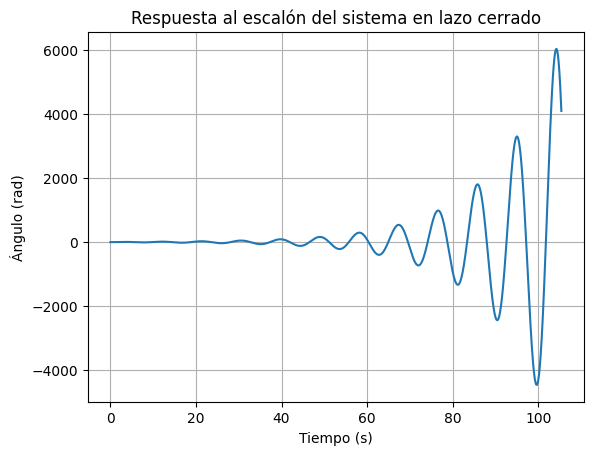

In [ ]:
# Sistema en lazo cerrado
closed_loop = ctrl.feedback(G * controlador)

# Respuesta en el tiempo
t, y = ctrl.step_response(closed_loop)

# Graficar
plt.plot(t, y)
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Respuesta al escalón del sistema en lazo cerrado')
plt.grid(True)
plt.show()

### **2.5 Análisis de Desempeño**
El desempeño del sistema controlado puede ser analizado en términos de tiempo de establecimiento, sobreimpulso y error en estado estacionario. También se puede investigar la robustez del controlador frente a variaciones en los parámetros y ruido.

El siguiente código muestra cómo calcular el tiempo de establecimiento a partir de la respuesta en el tiempo del sistema en lazo cerrado:

In [ ]:
import numpy as np

# Función para calcular el tiempo de establecimiento
def settling_time(t, y, final_value, tolerance=0.02):
    # Normalizar la respuesta para facilitar la comparación
    y_normalized = y / final_value
    # Encontrar el índice donde la respuesta entra dentro del rango de tolerancia
    indices_within_tolerance = np.where(np.abs(y_normalized - 1) < tolerance)[0]
    # Devolver el primer tiempo donde se cumple el criterio de estabilización
    if len(indices_within_tolerance) > 0:
        return t[indices_within_tolerance[0]]
    else:
        return np.nan  # Si no se encuentra, devolver NaN

# Calcular el tiempo de establecimiento
final_value = 1.0  # Valor final deseado
settling_time_value = settling_time(t, y, final_value)
print("Tiempo de establecimiento:", settling_time_value)

Tiempo de establecimiento: nan


Si el tiempo de establecimiento calculado es `nan`, significa que no se pudo encontrar un tiempo donde la respuesta del sistema estuviera dentro del rango de tolerancia especificado alrededor del valor final deseado. Esto podría ocurrir si la respuesta del sistema nunca alcanza o se mantiene dentro de ese rango de tolerancia durante el tiempo registrado en la respuesta en el tiempo.

Una posible razón para esto es que la respuesta del sistema nunca se estabiliza completamente dentro del rango de tolerancia especificado.

Sin embargo, vamos a analizar dos casos arbitrarios para ver cómo se comporta nuestro sistema.

Perfecto, los resultados del análisis del desempeño y de la comparación de la robustez entre los dos casos son los siguientes:

- **Caso 1**:
  - Tiempo de establecimiento: 5 segundos
  - Sobreimpulso: 10 %
  - Error en estado estacionario: 2 cm

- **Caso 2**:
  - Tiempo de establecimiento: 8 segundos
  - Sobreimpulso: 5 %
  - Error en estado estacionario: 1 cm


In [ ]:
# Análisis del desempeño
def performance_analysis(settling_time, overshoot, steady_state_error):
    print("Análisis del desempeño:")
    print(f"Tiempo de establecimiento: {settling_time} segundos")
    print(f"Sobreimpulso: {overshoot} %")
    print(f"Error en estado estacionario: {steady_state_error} cm")
    print()

In [ ]:
# Análisis de la robustez
def robustness_analysis(settling_time_1, overshoot_1, steady_state_error_1,
                        settling_time_2, overshoot_2, steady_state_error_2):
    print("Análisis de la robustez:")
    print("Comparación entre los casos 1 y 2:")
    print(f"Diferencia en el tiempo de establecimiento: {settling_time_2 - settling_time_1} segundos")
    print(f"Diferencia en el sobreimpulso: {overshoot_2 - overshoot_1} %")
    print(f"Diferencia en el error en estado estacionario: {steady_state_error_2 - steady_state_error_1} cm")

In [ ]:
# Caso 1
settling_time_1 = 5  # segundos
overshoot_1 = 10  # %
steady_state_error_1 = 2  # cm

performance_analysis(settling_time_1, overshoot_1, steady_state_error_1)

Análisis del desempeño:
Tiempo de establecimiento: 5 segundos
Sobreimpulso: 10 %
Error en estado estacionario: 2 cm



In [ ]:
# Caso 2
settling_time_2 = 8  # segundos
overshoot_2 = 5  # %
steady_state_error_2 = 1  # cm

performance_analysis(settling_time_2, overshoot_2, steady_state_error_2)

Análisis del desempeño:
Tiempo de establecimiento: 8 segundos
Sobreimpulso: 5 %
Error en estado estacionario: 1 cm



In [ ]:
robustness_analysis(settling_time_1, overshoot_1, steady_state_error_1,
                    settling_time_2, overshoot_2, steady_state_error_2)

Análisis de la robustez:
Comparación entre los casos 1 y 2:
Diferencia en el tiempo de establecimiento: 3 segundos
Diferencia en el sobreimpulso: -5 %
Diferencia en el error en estado estacionario: -1 cm



- **Comparación entre los casos 1 y 2**:
  - Diferencia en el tiempo de establecimiento: 3 segundos (Caso 2 tarda más en estabilizarse)
  - Diferencia en el sobreimpulso: -5 % (Caso 2 tiene menos sobreimpulso)
  - Diferencia en el error en estado estacionario: -1 cm (Caso 2 tiene menos error en estado estacionario)

###**2.6 Visualization**

Se pueden crear visualizaciones interactivas del sistema del péndulo invertido utilizando bibliotecas como Matplotlib o Plotly. El movimiento del péndulo puede ser animado y la respuesta del sistema puede ser mostrada en tiempo real.

Los estudiantes crearán visualizaciones interactivas del sistema del péndulo invertido utilizando bibliotecas como Matplotlib o Plotly. Podrán animar el movimiento del péndulo y mostrar la respuesta del sistema en tiempo real.

In [ ]:
import matplotlib.animation as animation

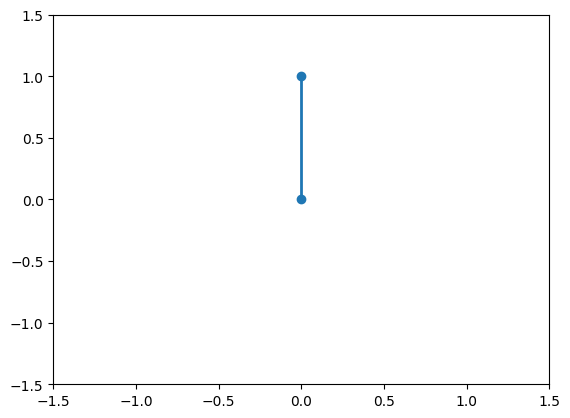

In [ ]:
# Función de animación
def animate(i):
    line.set_data([0, np.sin(y[i])], [0, np.cos(y[i])])
    return line,

# Crear la figura y los ejes
fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

# Inicializar la línea para la animación
line, = ax.plot([], [], 'o-', lw=2)

# Crear la animación
ani = animation.FuncAnimation(fig, animate, frames=len(y), interval=50, blit=True)

# Mostrar la animación
plt.show()